In [288]:
import pandas as pd

In [289]:
import numpy as np

In [290]:
import matplotlib.pyplot as plt

In [291]:
import seaborn as sns

In [292]:
import warnings

In [293]:
warnings.filterwarnings('ignore')

In [294]:
df=pd.read_excel('Flight_train.xlsx')

In [295]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


There are 11 columns. Price is our target attribute

In [296]:
df.shape

(10683, 11)

THere are 10683 rows in training dataset

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We see that Destination and total_stops have one null object each

In [298]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [299]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

converting date datatype from object to datetime datatype

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [301]:
df['Day']=df['Date_of_Journey'].dt.day

In [302]:
df['Month']=df['Date_of_Journey'].dt.month

In [303]:
df['Year']=df['Date_of_Journey'].dt.year

In [304]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [305]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [306]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


Removing Date_of_Journey from dataset 

In [307]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [308]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [309]:
df=df.dropna()
df.shape

(10682, 13)

Droping null data from dataset

In [310]:
df['Duration'] = df['Duration'].str.replace('h ',':').str.replace('m','')


Converting raw data into useful information by removing string data and splitting hour and minute

In [311]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2:50,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No info,12648,3,1,2019


In [312]:
df['Duration_Hr'],df['Duration_Min'] = df['Duration'].str.split(':',2).str
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str



In [313]:
df['Dep_Hr'],df['Dep_Min'] = df['Dep_Time'].str.split(':',2).str


In [314]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2:50,non-stop,No info,3897,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662,5,1,2019,7,25,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,19,NaN,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No info,6218,5,12,2019,5,25,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No info,13302,3,1,2019,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No info,4107,4,9,2019,2,30,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No info,4145,27,4,2019,2,35,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,3,NaN,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No info,12648,3,1,2019,2,40,11,30


In [315]:
df['Arrival_Time'],_ = df['Arrival_Time'].str.split(' ',1).str


In [316]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No info,3897,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662,5,1,2019,7,25,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,6,9,2019,19,NaN,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No info,6218,5,12,2019,5,25,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No info,13302,3,1,2019,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No info,4107,4,9,2019,2,30,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No info,4145,27,4,2019,2,35,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,3,NaN,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No info,12648,3,1,2019,2,40,11,30


In [317]:
df['Arr_Hr'],df['Arr_Min'] = df['Arrival_Time'].str.split(':',2).str


In [318]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No info','No Info')


In [319]:
# Converting data with same meaning but different due to block letters into same kind of data

In [320]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
 13  Duration_Hr      10682 non-null  int32 
 14  Duration_Min     9650 non-null   object
 15  Dep_Hr           10682 non-null  object
 16  Dep_Min          10682 non-null  object
 17  Arr_Hr           10682 non-null

In [322]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No Info,3897,24,3,2019,2,50,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No Info,7662,5,1,2019,7,25,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No Info,13882,6,9,2019,19,NaN,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No Info,6218,5,12,2019,5,25,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No Info,13302,3,1,2019,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No Info,4107,4,9,2019,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No Info,4145,27,4,2019,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,7229,27,4,2019,3,NaN,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No Info,12648,3,1,2019,2,40,11,30,14,10


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
 13  Duration_Hr      10682 non-null  int32 
 14  Duration_Min     9650 non-null   object
 15  Dep_Hr           10682 non-null  object
 16  Dep_Min          10682 non-null  object
 17  Arr_Hr           10682 non-null

In [324]:
#Visualizing the data

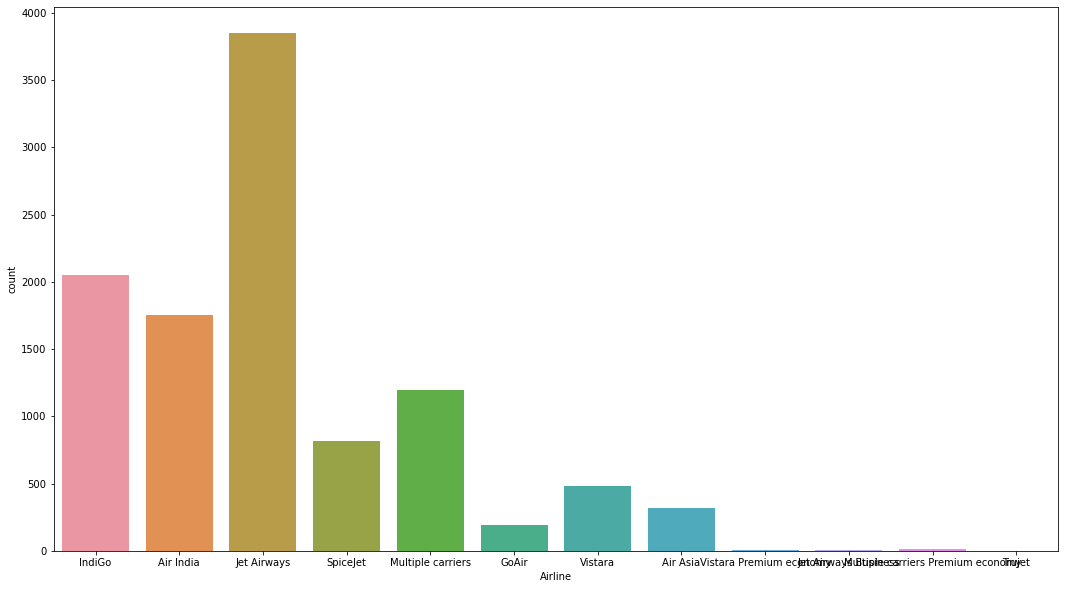

In [325]:
plt.figure(figsize=(18,10))
sns.countplot(df['Airline'])

Maximum number of flights in the dataset has Jetairways as carrier

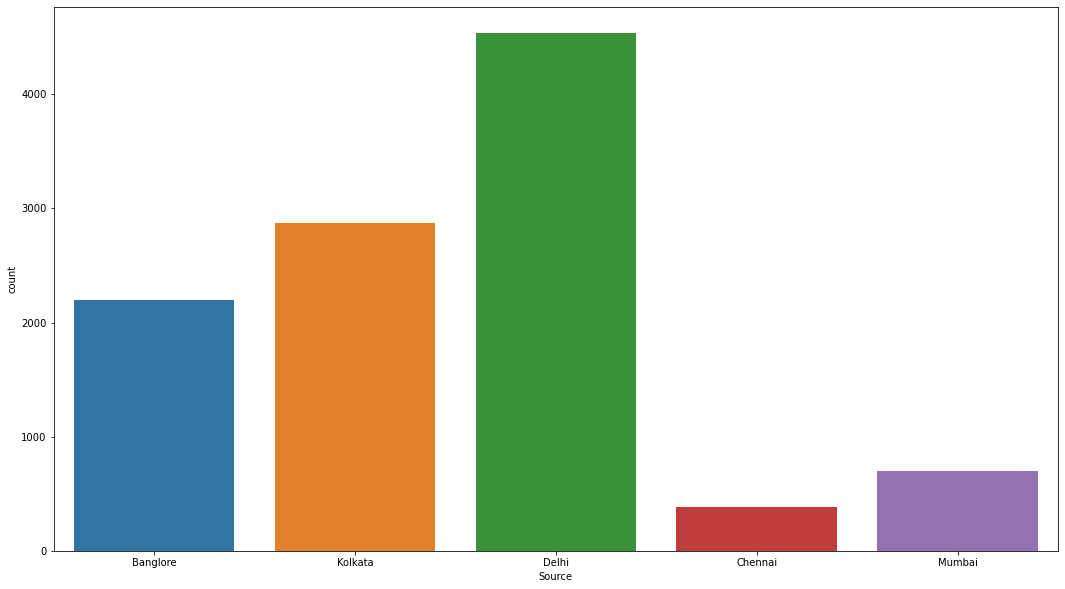

In [326]:
plt.figure(figsize=(18,10))
sns.countplot(df['Source'])

Most of the flights are from delhi

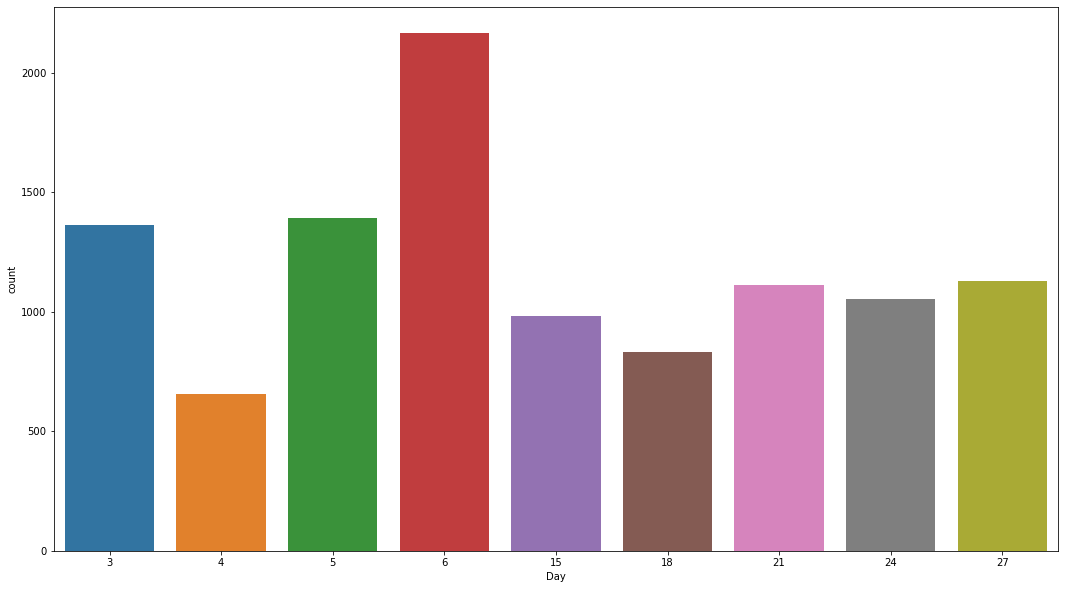

In [327]:
plt.figure(figsize=(18,10))
sns.countplot(df['Day'])

Many flights pick up on 6th day of the month

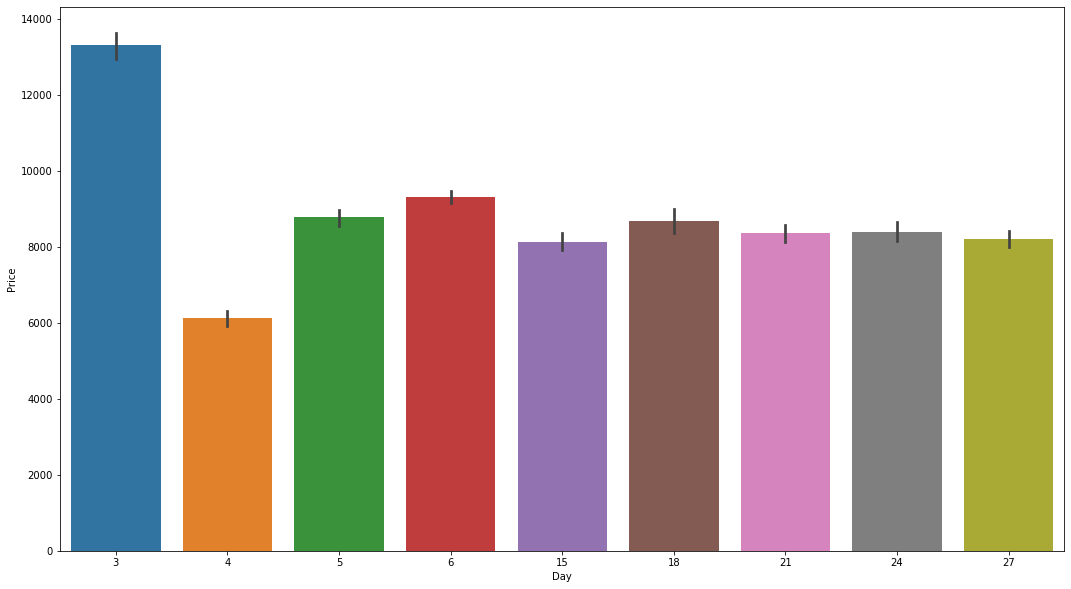

In [328]:
plt.figure(figsize=(18,10))
sns.barplot(df['Day'], df['Price'])

# The flights going on 3rd day of the month are having hisghest prices

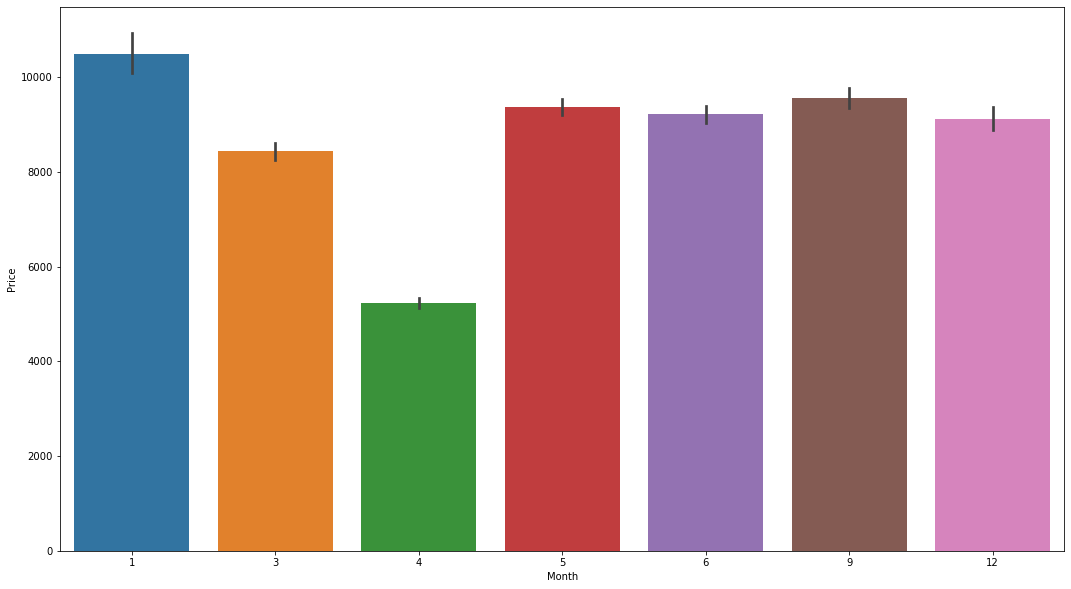

In [329]:
plt.figure(figsize=(18,10))
sns.barplot(df['Month'], df['Price'])

Prices are higher in January

In [330]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No Info,3897,24,3,2019,2,50,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No Info,7662,5,1,2019,7,25,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No Info,13882,6,9,2019,19,NaN,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No Info,6218,5,12,2019,5,25,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No Info,13302,3,1,2019,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No Info,4107,4,9,2019,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No Info,4145,27,4,2019,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,7229,27,4,2019,3,NaN,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No Info,12648,3,1,2019,2,40,11,30,14,10


In [331]:
df['Duration_Min']=df['Duration_Min'].replace(np.NaN,0)

In [332]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No Info,3897,24,3,2019,2,50,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No Info,7662,5,1,2019,7,25,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No Info,13882,6,9,2019,19,0,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,No Info,6218,5,12,2019,5,25,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,No Info,13302,3,1,2019,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,non-stop,No Info,4107,4,9,2019,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,non-stop,No Info,4145,27,4,2019,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,7229,27,4,2019,3,0,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,non-stop,No Info,12648,3,1,2019,2,40,11,30,14,10


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
 13  Duration_Hr      10682 non-null  int32 
 14  Duration_Min     10682 non-null  object
 15  Dep_Hr           10682 non-null  object
 16  Dep_Min          10682 non-null  object
 17  Arr_Hr           10682 non-null

In [334]:
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [335]:
df['Duration in Minutes'] = (df['Duration_Hr']*60)+df['Duration_Min']

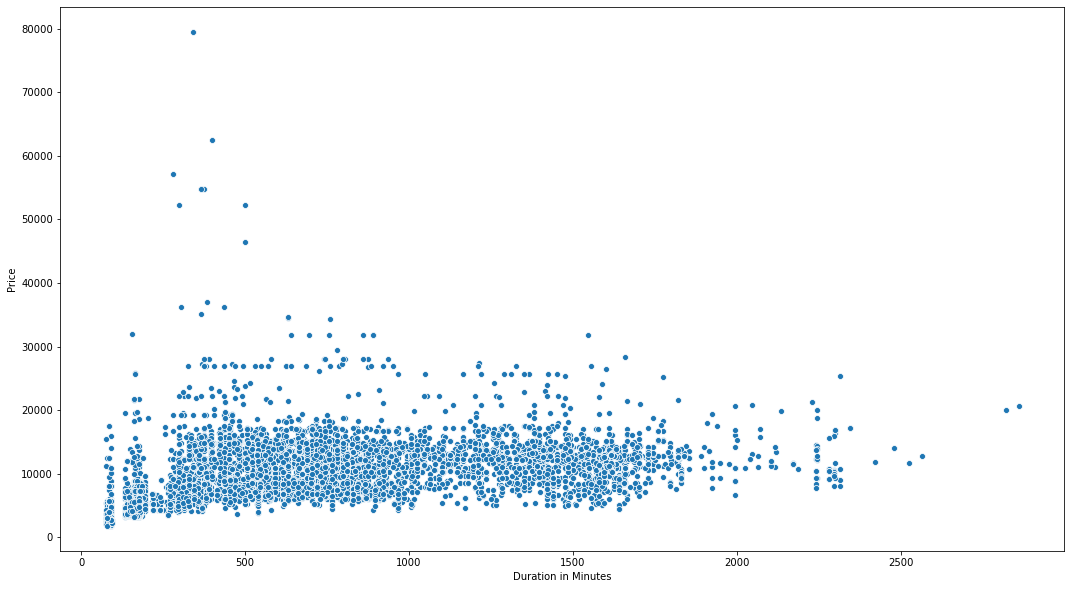

In [336]:
plt.figure(figsize=(18,10))
sns.scatterplot(df['Duration in Minutes'], df['Price'])

The price range is lying majorly in 0 to 10k range. Lesser the duration, more is the price

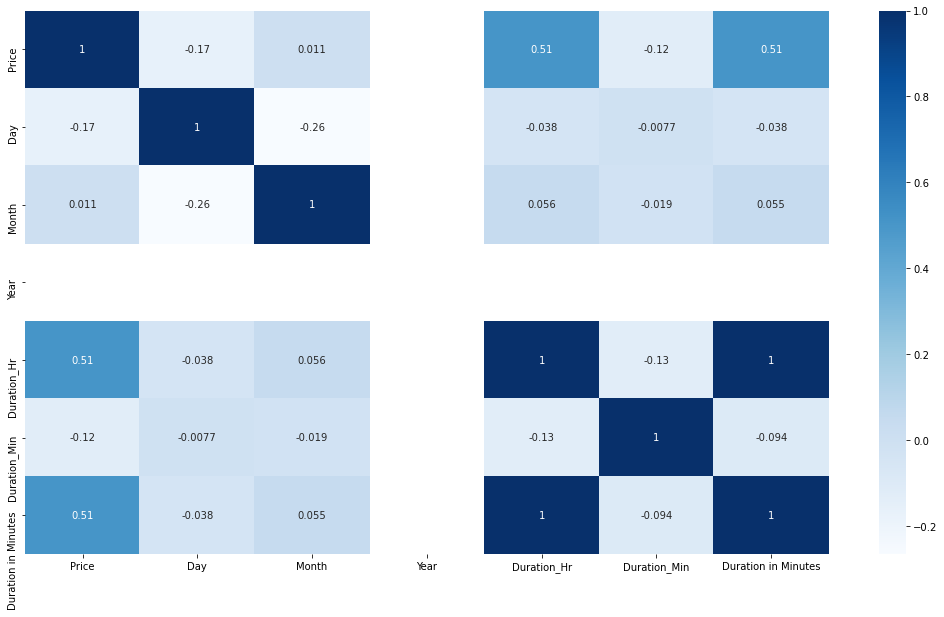

In [337]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Day and Duration has inverse relationship with price

Using label encoder

In [338]:
from sklearn.preprocessing import LabelEncoder

In [339]:
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [340]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hr,Duration_Min,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration in Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,6,3897,24,3,2019,2,50,22,20,01,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,6,7662,5,1,2019,7,25,05,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,6,13882,6,9,2019,19,0,09,25,04,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1 stop,6,6218,5,12,2019,5,25,18,05,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1 stop,6,13302,3,1,2019,4,45,16,50,21,35,285


In [341]:
df['Airline']=LE.fit_transform(df['Airline'])

In [342]:
df['Source']=LE.fit_transform(df['Source'])

In [343]:
df['Total_Stops']=LE.fit_transform(df['Total_Stops'])

In [344]:
df['Destination']=LE.fit_transform(df['Destination'])

In [345]:
df.drop('Route',axis=1,inplace=True)

In [346]:
df.drop('Dep_Time',axis=1,inplace=True)

In [347]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  int32 
 1   Source               10682 non-null  int32 
 2   Destination          10682 non-null  int32 
 3   Duration             10682 non-null  object
 4   Total_Stops          10682 non-null  int32 
 5   Additional_Info      10682 non-null  int32 
 6   Price                10682 non-null  int64 
 7   Day                  10682 non-null  int64 
 8   Month                10682 non-null  int64 
 9   Year                 10682 non-null  int64 
 10  Duration_Hr          10682 non-null  int32 
 11  Duration_Min         10682 non-null  int32 
 12  Dep_Hr               10682 non-null  object
 13  Dep_Min              10682 non-null  object
 14  Arr_Hr               10682 non-null  object
 15  Arr_Min              10682 non-null  object
 16  Dura

In [349]:
df.drop('Duration',axis=1,inplace=True)

In [350]:
df1 = df[['Airline', 'Source', 'Destination', 'Total_Stops',
         'Additional_Info', 'Price', 'Day', 'Month', 'Duration in Minutes']]

In [351]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Duration in Minutes'],
      dtype='object')

In [352]:
x=df1.drop('Price',axis=1)

In [353]:
x.shape

(10682, 8)

In [354]:
y=df1['Price']

In [355]:
y.shape

(10682,)

In [356]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [357]:
from sklearn.svm import SVR


In [358]:
from sklearn.neighbors import KNeighborsRegressor


In [359]:
from sklearn.ensemble import RandomForestRegressor


In [360]:
from sklearn.tree import DecisionTreeRegressor


In [361]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [363]:
maxAccu=0
maxRS=0

In [364]:
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print('Best r2 score is ',maxAccu, 'on random state',maxRS)
    

Best r2 score is  0.8038305851936274 on random state 99


In [365]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)


In [366]:
DTR=DecisionTreeRegressor()

In [367]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [368]:
pred_dtr=DTR.predict(x_test)

In [369]:
rs_dtr=r2_score(y_test,pred_dtr)

In [370]:
print(rs_dtr)

0.8037655771533894


In [371]:
RFR=RandomForestRegressor()

In [372]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [373]:
pred_rfr=RFR.predict(x_test)

In [374]:
rs_rfr=r2_score(y_test,pred_rfr)

In [375]:
print(rs_rfr)

0.8561960749975398


In [376]:
KNR=KNeighborsRegressor()

In [377]:
KNR.fit(x_train,y_train)

KNeighborsRegressor()

In [378]:
pred_knr=KNR.predict(x_test)

In [379]:
rs_knr=r2_score(y_test,pred_knr)

In [380]:
print(rs_knr)

0.5700734679046517


In [381]:
svr=SVR()

In [382]:
svr.fit(x_train,y_train)

SVR()

In [383]:
pred_svr=svr.predict(x_test)

In [384]:
rs_svr=r2_score(y_test,pred_svr)

In [385]:
print(rs_svr)

0.15835323266623513


In [386]:
from sklearn.model_selection import cross_val_score


In [387]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.7387372846185452


In [388]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.8248803111039622


In [389]:
print(cross_val_score(KNR,x,y,cv=5).mean())

0.5345765430766142


In [390]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.16013275023231693


Best algorithm is RandomForestRegressor

In [391]:
#GridSearchCV

In [392]:
from sklearn.model_selection import GridSearchCV

In [393]:
parameter={'max_features':['auto','sqrt','log2'],'bootstrap':[True,False],'oob_score':[True,False],'warm_start':[True,False]}

In [394]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [395]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [396]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'oob_score': False,
 'warm_start': True}

In [398]:
Final_mod=RandomForestRegressor(bootstrap=True,max_features='log2',oob_score=False,warm_start=True)

In [399]:
Final_mod.fit(x_train,y_train)

RandomForestRegressor(max_features='log2', warm_start=True)

In [400]:
pred_final=Final_mod.predict(x_test)

In [401]:
rs_final=r2_score(y_test,pred_final)

In [402]:
print(rs_final)

0.8417747109104687


In [403]:
import joblib

In [404]:
joblib.dump(Final_mod,'Price_prediction.pkl')

['Price_prediction.pkl']